In [1]:
import pandas as pd
import numpy as np

# WTF???
# import warnings
# warnings.filterwarnings('ignore')

## task01

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
data = boston['data']
feature_names = boston['feature_names']
target = boston['target']

In [5]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
X = pd.DataFrame(data, columns = feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
y = pd.DataFrame(target, columns = ['price'])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# ?train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = lr.predict(X_test)
y_pred.flatten()

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [17]:
check = pd.DataFrame({'y_test': y_test['price'], 'y_pred': y_pred.flatten()})
check.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [19]:
# ?r2_score

In [20]:
# ?mean_squared_error

In [21]:
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
R2

0.711226005748496

### wieghts show

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline

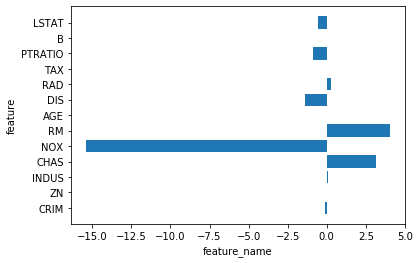

In [23]:
plt.barh(feature_names, lr.coef_.flatten())
plt.xlabel('feature_name')
plt.ylabel('feature')
plt.show()

### standart scaler

In [24]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.469887,11.403955,11.133051,0.073446,0.557259,6.325672,68.799718,3.765874,9.437853,407.042373,18.277966,359.701808,12.421130
std,8.315831,22.608457,6.938651,0.261237,0.116792,0.719211,27.665360,2.126032,8.639971,166.522237,2.256792,86.924779,7.112402
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082320,0.000000,5.130000,0.000000,0.450000,5.889500,46.025000,2.073700,4.000000,279.000000,16.650000,376.782500,6.862500
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.227500,77.350000,3.107300,5.000000,330.000000,18.600000,391.600000,10.925000
75%,3.281688,20.000000,18.100000,0.000000,0.631000,6.681750,93.475000,5.400700,24.000000,666.000000,20.200000,396.172500,16.225000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
# ?StandardScaler

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

In [28]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred_scaled = lr.predict(X_test_scaled)

In [30]:
check = pd.DataFrame({'y_test': y_test['price'], 'y_pred_scaled': y_pred_scaled.flatten()})
check.head(10)

,y_test,y_pred_scaled
173,23.6,30.778348
274,32.4,38.665815
491,13.6,16.967053
72,22.8,26.790358
452,16.1,20.360680
76,20.0,24.893864
316,17.8,18.989490
140,14.0,15.445544
471,19.6,24.502057
500,16.8,22.124555


In [31]:
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
R2_scaled = r2_score(y_test, y_pred_scaled)
R2_scaled

0.6761000049033605

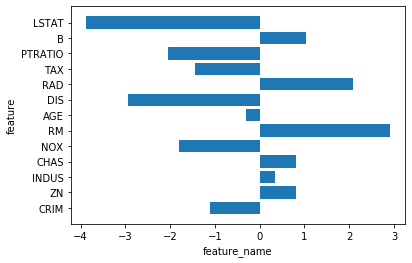

In [32]:
plt.barh(feature_names, lr.coef_.flatten())
plt.xlabel('feature_name')
plt.ylabel('feature')
plt.show()

### important features only

In [33]:
important_features = [feature for feature, weight in zip(feature_names, lr.coef_.flatten()) if np.abs(weight) > 0.5]
important_features

['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [34]:
lr.fit(X_train_scaled.loc[:, important_features ], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_pred_important_features = lr.predict(X_test_scaled.loc[:, important_features ])

In [36]:
check = pd.DataFrame({'y_test': y_test['price'], 'y_pred_important_features': y_pred_important_features.flatten()})
check.head(10)

,y_test,y_pred_important_features
173,23.6,31.185231
274,32.4,38.475234
491,13.6,16.785923
72,22.8,26.233244
452,16.1,20.328921
76,20.0,24.905797
316,17.8,19.122617
140,14.0,15.104928
471,19.6,24.515552
500,16.8,22.308676


In [37]:
mse_important_features = mean_squared_error(y_test, y_pred_important_features)
R2_important_features = r2_score(y_test, y_pred_important_features)
R2_important_features

0.6799128298280106

## task 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
# ?RandomForestRegressor

In [42]:
model = RandomForestRegressor(max_depth = 12, random_state = 42)

In [43]:
model.fit(X_train, y_train.values[: , 0])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [44]:
y_pred_RFR = model.predict(X_test)

In [45]:
check = pd.DataFrame({'y_test': y_test['price'], 'y_pred_RFR': y_pred_RFR.flatten()})
check.head(10)

,y_test,y_pred_RFR
173,23.6,23.156214
274,32.4,31.199000
491,13.6,16.011514
72,22.8,24.227608
452,16.1,16.940542
76,20.0,21.847517
316,17.8,19.732158
140,14.0,14.911167
471,19.6,21.508747
500,16.8,21.239091


In [46]:
mse_RFR = mean_squared_error(y_test, y_pred_RFR)
R2_RFR = r2_score(y_test, y_pred_RFR)
R2_RFR

0.8691643189868505

In [47]:
model.fit(X_train_scaled, y_train.values[: , 0])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [48]:
y_pred_RFR_scaled = model.predict(X_test_scaled)

In [49]:
check = pd.DataFrame({'y_test': y_test['price'], 'y_pred_RFR_scaled': y_pred_RFR_scaled.flatten()})
check.head(10)

,y_test,y_pred_RFR_scaled
173,23.6,25.930076
274,32.4,33.420833
491,13.6,16.828214
72,22.8,24.993721
452,16.1,17.066588
76,20.0,21.776661
316,17.8,19.552869
140,14.0,15.885500
471,19.6,21.595085
500,16.8,21.389485


In [50]:
mse_RFR_scaled = mean_squared_error(y_test, y_pred_RFR_scaled)
R2_RFR_scaled = r2_score(y_test, y_pred_RFR_scaled)
R2_RFR_scaled

0.8508928498748984

In [51]:
model.fit(X_train_scaled.loc[:, important_features ], y_train.values[: , 0])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [52]:
y_pred_RFR_important_features = model.predict(X_test_scaled.loc[:, important_features ])

In [53]:
check = pd.DataFrame({'y_test': y_test['price'], 'y_pred_RFR_important_features': y_pred_RFR_important_features.flatten()})
check.head(10)

,y_test,y_pred_RFR_important_features
173,23.6,26.193466
274,32.4,33.898500
491,13.6,16.458571
72,22.8,24.926783
452,16.1,17.170623
76,20.0,21.615060
316,17.8,19.856835
140,14.0,15.748700
471,19.6,21.640377
500,16.8,21.421849


In [54]:
mse_RFR_important_features = mean_squared_error(y_test, y_pred_RFR_important_features)
R2_RFR_important_features = r2_score(y_test, y_pred_RFR_important_features)
R2_RFR_important_features

0.8462481201315699

## Results

In [56]:
res_R2 = pd.DataFrame({
    'LR': [R2, R2_scaled, R2_important_features], 
    'RFR': [R2_RFR, R2_RFR_scaled, R2_RFR_important_features]
}, index = ['as is', 'scaled features', 'important features'])
res_R2

,LR,RFR
as is,0.711226,0.869164
scaled features,0.676100,0.850893
important features,0.679913,0.846248


In [57]:
res_mse = pd.DataFrame({
    'LR': [mse, mse_scaled, mse_important_features], 
    'RFR': [mse_RFR, mse_RFR_scaled, mse_RFR_important_features]
}, index = ['as is', 'scaled features', 'important features'])
res_mse

,LR,RFR
as is,21.517444,9.748972
scaled features,24.134791,11.110435
important features,23.850686,11.456529


##### Как оценивать результаты? 
В данном случае лучше работает метод случайного леса, R2 у него выше везде.
Но как оценивать тот факт, что R2 выше для обеих моделей, построенных на данных 'как есть', а по mse в случае линейной регрессии результат лучше на стандартизированных данных, а в случае случайного леса - в случае отбора признаков?

In [58]:
check_total = pd.DataFrame({
    'y_test': y_test['price'], 
    'y_pred': y_pred.flatten(),
    'y_pred_scaled': y_pred_scaled.flatten(),
    'y_pred_important_features': y_pred_important_features.flatten(),
    'y_pred_RFR': y_pred_RFR.flatten(),
    'y_pred_RFR_scaled': y_pred_RFR_scaled.flatten(),
    'y_pred_RFR_important_features': y_pred_RFR_important_features.flatten()
})
check_total.head(10)

,y_test,y_pred,y_pred_scaled,y_pred_important_features,y_pred_RFR,y_pred_RFR_scaled,y_pred_RFR_important_features
173,23.6,28.648960,30.778348,31.185231,23.156214,25.930076,26.193466
274,32.4,36.495014,38.665815,38.475234,31.199000,33.420833,33.898500
491,13.6,15.411193,16.967053,16.785923,16.011514,16.828214,16.458571
72,22.8,25.403213,26.790358,26.233244,24.227608,24.993721,24.926783
452,16.1,18.855280,20.360680,20.328921,16.940542,17.066588,17.170623
76,20.0,23.146689,24.893864,24.905797,21.847517,21.776661,21.615060
316,17.8,17.392124,18.989490,19.122617,19.732158,19.552869,19.856835
140,14.0,14.078599,15.445544,15.104928,14.911167,15.885500,15.748700
471,19.6,23.036927,24.502057,24.515552,21.508747,21.595085,21.640377
500,16.8,20.599433,22.124555,22.308676,21.239091,21.389485,21.421849


## task03

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [59]:
?RandomForestRegressor

In [84]:
sum_importances = np.sum(model.feature_importances_.flatten())
sum_importances

1.0

In [85]:
top2_features = [feature for feature, importance in zip(important_features, model.feature_importances_.flatten()) 
                 if importance in pd.Series(model.feature_importances_.flatten()).nlargest(2).values
                ]
top2_features

['RM', 'LSTAT']